# 0 Setup

In this sections we set up the notebook, and import the tensorfow/keras packages.

You should re-run this section if you need to restart your notebook. 

Some things to keep in mind as you work through these examples: 
    
    * Don't be afraid to experiment and see what happens
    * Make good use of the documentation and/or help files, when you need them.
    * Sometimes machine-learning models can be a little picky about the data type.  Originally, it prefered numpy arrays, but has been improving its Pandas support.  Still, sometimes numpy is better.  Sometimes it is picky about the shape of numpy arrays.

## 0.1 Module Imports

**Importing Necessary Modules**
First, we import the modules that we will be using.  Some modules may be imported later on as needed. 

In [0]:
## Standard Modules for DataScience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Metrics to help evaluate the models
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
## TensorFlow/Keras, for building Neural Network Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 0.2 Mounting the Google Drive

**Mounting the Google Drive**

This assumes you have previously downloaded the data science camp GitHub repository, and are running this notebook from its location in that repository.  Otherwise, you may need to adjust the path to the data as needed.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


In [0]:
## Change the current directory
%cd '/content/gdrive/My Drive/dscamp/dscamp_public/Neural Networks'

/content/gdrive/My Drive/dscamp/dscamp_public/Neural Networks


In [0]:
%ls

## 0.3 Create Utility Functions
The code block below contains several functions designed to simplify using neural networks. 

In [0]:
def sigmoid(x):
    """Calculate the sigmoid function of the input"""
    f =  1/(1+np.exp(-1*x))
    return f

def tanh(x):
    """Calculate the hyperbolic tangent"""
    f = np.tanh(x)
    return f

def log_loss(y, yhat):
    """Calculate the log-loss for a set of true y and predicted y"""
    l = y*np.log(yhat) + (1-y)*np.log(1-yhat)
    return l.sum()

def plot_learning_loss(hst):
    """
    Input:
    ---------------
    hst - The training history from a keras model
    
    Returns:
    ---------------
    A figure object with learning curves showing the loss (and accuracy, if available)
    
    """
    fig, ax = plt.subplots(1,1, figsize=(20,10))
    ax.plot(hst.history['loss'], label='Training')
    if 'val_loss' in hst.history.keys():
        ax.plot(hst.history['val_loss'], label='Validation')
        ax.legend()
    ax.set_title('Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss')
    return fig
    

# 1 Example Calculations (Optional)

In this section, we carry out the example calculations from the accompanying slides.  

## Single Neuron Calculations

This should illustrate that TensorFlow/Keras is not efficient for a single neuron, but later we will see that it is efficient for networks of many neurons.

In [0]:
## By Hand
## This is a blank cell to use Python as a calculator, if you are so inclined.


In [0]:
## Example Node 1
ex_node = Sequential()
ex_node.add(Dense(1, input_dim=3, name='mynode', activation='linear'))
weights = np.array([2,0,-1]).reshape((3,1))
bias = np.array([2]).reshape((1,))
ex_node.get_layer('mynode').set_weights([weights, bias])

In [0]:
x = np.array([2,-2, 1]).reshape((1,3))
ex_node.predict(x)

array([[5.]], dtype=float32)

In [0]:
## Example Node 2
ex_node = Sequential()
ex_node.add(Dense(1, input_dim=3, name='mynode', activation='sigmoid'))
weights = np.array([2,0,-1]).reshape((3,1))
bias = np.array([2]).reshape((1,))
ex_node.get_layer('mynode').set_weights([weights, bias])

In [0]:
x = np.array([2,-2, 1]).reshape((1,3))
ex_node.predict(x)

array([[0.9933072]], dtype=float32)

In [0]:
## Network Computation Example 1
## This builds the network from example 3
ex_net = Sequential()
ex_net.add(Dense(2, input_dim=3, activation='linear', name='hl1'))
ex_net.add(Dense(1, activation='sigmoid', name='hl2'))
weights1 = np.array([[1,-1],[-1,0], [0,2]])
bias1 = np.array([0,0])
weights2 = np.array([-1,1]).reshape((2,1))
bias2 = np.array([1])
ex_net.get_layer('hl1').set_weights([weights1, bias1])
ex_net.get_layer('hl2').set_weights([weights2, bias2])


In [0]:
ex_net.layers[0].get_weights()

[array([[ 1., -1.],
        [-1.,  0.],
        [ 0.,  2.]], dtype=float32), array([0., 0.], dtype=float32)]

In [0]:
## Here we can use the predict() method of the network to calculate the output
x = np.array([2, -2, 1]).reshape((1,3))
ex_net.predict(x)

array([[0.04742587]], dtype=float32)

### Example Loss Function Calculation

These are blank cells to ccarry out calculations of the loss function from the example in the accompanying slides.

# 2 Building and Training Neural Networks to Credit Worthness

We revisit the example from the previous module, this time using neural networks to predict credit-worthiness.


## 2.1 Load and Prepare the Data
We load in the data, split off the testing set, and then **rescale** the data.

In [0]:
## Add the PATH to the data
df = pd.read_csv('data/face_data2.csv', index_col="face_id")

In [0]:
## Take a look at the data structure
df.head()

,age,gender,relationship,music_genre,band,team,first_name,last_name,education,education_prompt,work,work_prompt,fav_movie_1,fav_movie_2,fav_book_1,fav_book_2,fav_book_3,fav_auth_1,fav_auth_2,fav_auth_3,fav_food_1,fav_food_2,fav_food_3,home_city,home_state,languages,hogwarts,fav_pet,vg_genre,fav_video_game,spouse_id,n_friends,credit,gender_female,gender_male,relationship_married,relationship_single,relationship_widowed,music_genre_classical,music_genre_country,music_genre_electronic,music_genre_folk,music_genre_heavy metal,music_genre_hip-hop,music_genre_jazz,music_genre_rock,music_genre_tibetian throat singing,hogwarts_gryffindor,hogwarts_hufflepuff,hogwarts_ravenclaw,hogwarts_slytherin,fav_pet_birds,fav_pet_cats,fav_pet_dogs,fav_pet_fish,fav_pet_horses,fav_pet_reptiles,fav_pet_rodents
face_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12.0,male,single,country,Terminal Of The Authority,Kansas City Chiefs,Gary,Stearns,none,Goes to Pleasant Grove Grammar School,unemployed,NaN,"['La vita è bella', 'Addams Family Values', 'O...","['The Shortcut', 'Gremlins 2: The New Batch', ...",Inferno,The Second Summer of the Sisterhood,Omertà,Dan Brown,Ann Brashares,Mario Puzo,Fried Green Tomato BLT,Sweet-Pea Canapes,"Squid Ink Pasta with Shrimp, Nduja, and Tomato",Madeira,OH,3,gryffindor,rodents,Racing,Need for Speed Underground,0,4,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,43.0,male,single,heavy metal,Mutant Be,Arizona Cardinals,Andre,Garfinkle,general_education,Went to Elk Valley School,Provider Federated Universal,Works ascook atProvider Federated Universal,"['Justice League', 'The Scorpion King: Rise of...","['The Amazing Spider-Man', 'The Lego Batman Mo...",Dead or Alive,Мастер и Маргарита,The Copper Beech,"Tom Clancy, Grant Blackwood","Mikhail Bulgakov, Katherine Tiernan O'Connor, ...",Maeve Binchy,Spicy Fennel-Meyer Lemon Mignonette,Sesame Seed and Árbol Chile Salsa,Crisp Potato Pancakes with Goat Cheese on Mixe...,Berkley,MI,4,gryffindor,rodents,Role-Playing,Fallout 4,0,13,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,42.0,male,single,folk,Triumphant Petition,Jacksonville Jaguars,John,Landrum,doctor,Went to Waterford College,Industries Technology Omega,Works as professor at Industries Technology Omega,"['Terminator 2: Judgment Day', 'Planet of the ...","['Titanic', 'Sing', 'The Godfather: Part II']",The Outsiders,Misbehaving,NW,S.E. Hinton,Abbi Glines,Zadie Smith,Salted Coconut Granola,Salted Honey and Chocolate Bark,Orange Roughy with Indian-Spiced Tomato Sauce,Wagner,PA,3,hufflepuff,rodents,Role-Playing,The Elder Scrolls V: Skyrim,0,9,0.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,29.0,female,married,country,Vitally Technicality With The Beaker Breaker,Oakland Raiders,Sandra,Cole,general_education,Went to Sandalwood University,Building Software Innovation,Works aswaiter atBuilding Software Innovation,"['Stories We Tell', 'Inside Job', ""Being Elmo:...","['The Shining', 'The Hunger Games: Mockingjay ...",There's a Nightmare in My Closet (Pied Piper B...,Friday Night Bites: A Chicagoland Vampires Novel,Tricked,Mercer Mayer,Chloe Neill,Kevin Hearne,"Sauteed Chicken Breasts with Pear, Bell Pepper...",Poached Oysters in Fennel-Saffron Soup,Brown-Sugar Pudding,St. Johns,MI,3,slytherin,rodents,Role-Playing,The Witcher 3: Wild Hunt,0,3,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,50.0,male,married,heavy metal,Der Carnage,Miami Dolphins,Ricky,Franklin,bachelor,Went to Monarch College,North Medicine,Works aswriterat North Medicine,"[""Schindler's List"", 'Equals', 'Gladiator']","['Rough Night', 'The Dark Knight Rises', 'The ...",The Freedom Writers Diary: How a Teacher and 1...,Peeps,Islands in the Stream,"Erin Gruwell, Zlata Filipović, The Freedom Wri...",Scott Westerfeld,Ernest Hemingway,"Toasted Gruyère, Golden Onion, and Apple Sandw...",Yogurt-Lime Sorbet,"Cornmeal Pound Cake with Rosemary Syrup, Poach...",Broadway,NC,1,slytherin,rodents,Visual Novel,Tears to Tiara II: Heir of t

In [0]:
## This is a way to look at all the variables in the data
df.columns


Index(['age', 'gender', 'relationship', 'music_genre', 'band', 'team',
       'first_name', 'last_name', 'education', 'education_prompt', 'work',
       'work_prompt', 'fav_movie_1', 'fav_movie_2', 'fav_book_1', 'fav_book_2',
       'fav_book_3', 'fav_auth_1', 'fav_auth_2', 'fav_auth_3', 'fav_food_1',
       'fav_food_2', 'fav_food_3', 'home_city', 'home_state', 'languages',
       'hogwarts', 'fav_pet', 'vg_genre', 'fav_video_game', 'spouse_id',
       'n_friends', 'credit', 'gender_female', 'gender_male',
       'relationship_married', 'relationship_single', 'relationship_widowed',
       'music_genre_classical', 'music_genre_country',
       'music_genre_electronic', 'music_genre_folk', 'music_genre_heavy metal',
       'music_genre_hip-hop', 'music_genre_jazz', 'music_genre_rock',
       'music_genre_tibetian throat singing', 'hogwarts_gryffindor',
       'hogwarts_hufflepuff', 'hogwarts_ravenclaw', 'hogwarts_slytherin',
       'fav_pet_birds', 'fav_pet_cats', 'fav_pet_dogs', 'fav_

When examining the data, we notice that several of the variables have been what we refer to as "dummy codded".  

Since neural networks are in some sense a very complicated calculator, they work much better with numbers than they do with words.  In order to make words understandable, we often need to convert the words into numbers.  

For example, look at the "fav_pet" variable.


In [0]:
df['fav_pet'].value_counts()

dogs        162
horses      151
reptiles    150
birds       148
fish        133
cats        130
rodents     126
Name: fav_pet, dtype: int64

To make this more understandable, we "dummy code" or "one hot encode" this variable.  

For each possible value, such as "dogs", we give the value of 1 if "fav_pet" is "dogs", and 0 otherwise.  We can see this below:

In [0]:
pd.crosstab(df['fav_pet'], [df['fav_pet_birds'],  df['fav_pet_cats'],  df['fav_pet_dogs'],  df['fav_pet_fish'],  df['fav_pet_horses'],  
                            df['fav_pet_reptiles'], df['fav_pet_rodents']])

fav_pet_birds       0                             1
fav_pet_cats        0                        1    0
fav_pet_dogs        0                   1    0    0
fav_pet_fish        0              1    0    0    0
fav_pet_horses      0         1    0    0    0    0
fav_pet_reptiles    0    1    0    0    0    0    0
fav_pet_rodents     1    0    0    0    0    0    0
fav_pet                                            
birds               0    0    0    0    0    0  148
cats                0    0    0    0    0  130    0
dogs                0    0    0    0  162    0    0
fish                0    0    0  133    0    0    0
horses              0    0  151    0    0    0    0
reptiles            0  150    0    0    0    0    0
rodents           126    0    0    0    0    0    0

_Note: These variables were created with the pandas function pd.get_dummies(), if you would like to create some for your own project._

### 2.1.1 Splitting the Data
Split the data into training/testing split.  We use the train_test_split from the scikit-learn model selection.

Before we split, we should decide which variables to use as predictors.  We should definitely include those that were used in the logistic regression model, but also some others from the list of variables.

**Question:** Why do you think it would not be useful to include variables like 'last_name', 'band', 'team', or "fav_food" make good predictors, even if they were dummy-coded?

**Question 2:** Can you think of reasons why some of these variables may be a **BAD IDEA** for a bank to use if it wants to use such a model to select who gets a credit card?

In [0]:
## Of the available variables, these may be considered to be predictors
potential_pred_vars = ['age',  'languages',
       'n_friends', 'gender_female', 'gender_male',
       'relationship_married', 'relationship_single', 'relationship_widowed',
       'music_genre_classical', 'music_genre_country',
       'music_genre_electronic', 'music_genre_folk', 'music_genre_heavy metal',
       'music_genre_hip-hop', 'music_genre_jazz', 'music_genre_rock',
       'music_genre_tibetian throat singing', 'hogwarts_gryffindor',
       'hogwarts_hufflepuff', 'hogwarts_ravenclaw', 'hogwarts_slytherin',
       'fav_pet_birds', 'fav_pet_cats', 'fav_pet_dogs', 'fav_pet_fish',
       'fav_pet_horses', 'fav_pet_reptiles', 'fav_pet_rodents']

In [0]:
## Select some of the above variables to use as predictors
## Feel free to use some of what you learned about this data in a the previous module
pred_vars = ['age', 'n_friends', 'hogwarts_gryffindor',
       'hogwarts_hufflepuff', 'hogwarts_ravenclaw', 'hogwarts_slytherin',
       'fav_pet_birds', 'fav_pet_cats', 'fav_pet_dogs', 'fav_pet_fish',
       'fav_pet_horses', 'fav_pet_reptiles', 'fav_pet_rodents']

response = 'credit'

In [0]:


x = df[pred_vars]
y = df[response]


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=123)

### 2.1.2 Rescale the Data
The scikit-learn preprocessing  module has a few options, including a t StandardScaler(), which subtracts the variable mean and divides by the variable standard deviation and a MinMaxScaler() that maps the smallest value to

The scalers work on each column (variable) seperately.

Also, notice that the scalers behave like scikit-learn model objects.  You first fit them to the data to learn the transformation, and then create rescaled data by using the _transform()_ method.  

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

my_scaler = MinMaxScaler()
my_scaler.fit(xtrain)


## Rescaled Data
xs_train = my_scaler.transform(xtrain)
xs_test = my_scaler.transform(xtest)




### 2.1.3 Some Questions about Data Preparation

**Q:** Why do we learn our scaling function using only the training data? Why not use the mean/standard of the complete data set?


**Q2:** Why do we not need to scale the response variable, y?

## 2.2 Build a Neural Network with a Single Hidden Layer
Here we build our first neural network.  We chose a relatively small single hidden layer.


In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
xs_train.shape

(750, 13)

In [0]:
## Start by creating a model object
nn1 = Sequential()
## Add a hidden layer-- specify the dimension of the input.  Choose an activation function and a name
nn1.add(Dense(3, input_dim=xs_train.shape[1] , activation='tanh', name='hl1'))
nn1.add(Dense(1, activation='sigmoid', name='output'))

In [0]:
## Compile the model
np.random.seed(55) ## Set the seed for reproducibility
nn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [0]:
## Fit the model 
hst = nn1.fit(xs_train, ytrain, batch_size=250, epochs=10, validation_data=(xs_test, ytest), verbose=0)

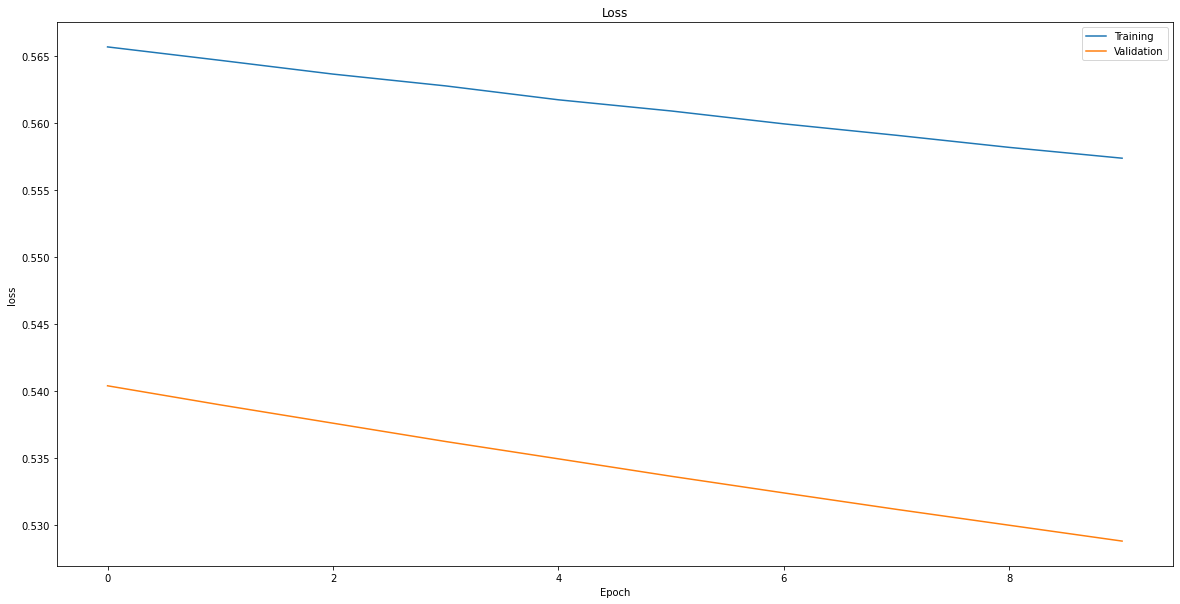

In [0]:
ff = plot_learning_loss(hst)

This seems like our network is still learning.  Let's try training it for longer.

In [0]:
## Fit the model 
hst = nn1.fit(xs_train, ytrain, batch_size=250, epochs=20, validation_split=0.2, verbose=0)

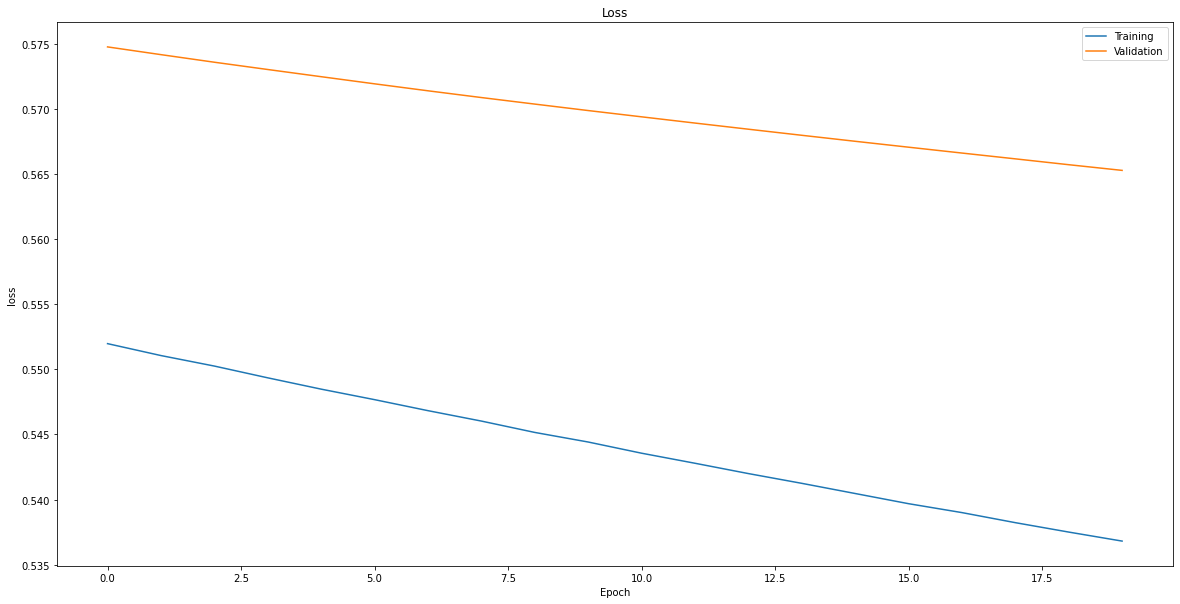

In [0]:
ff = plot_learning_loss(hst)

**Note:** What is going on here?  The training calling fit() on the model again caused the model to pick up where it started, rather than starting again.  In this case (and many other), it may be useful, but often we want to change some parameters on the model, and start it again.  

Let's do this now.  Let's build a model from the beginning, and try a smaller batch size.

In [0]:
## Start by creating a model object
nn1 = Sequential()
## Add a hidden layer-- specify the dimension 
nn1.add(Dense(3, input_dim=xs_train.shape[1] , activation='tanh', name='hl1'))
nn1.add(Dense(1, activation='sigmoid', name='output'))

In [0]:
## Compile the model
np.random.seed(55) ## Set the seed for reproducibility
nn1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [0]:
## Fit the model 
hst = nn1.fit(xs_train, ytrain, batch_size=50, epochs=100, validation_split=0.2, verbose=0)

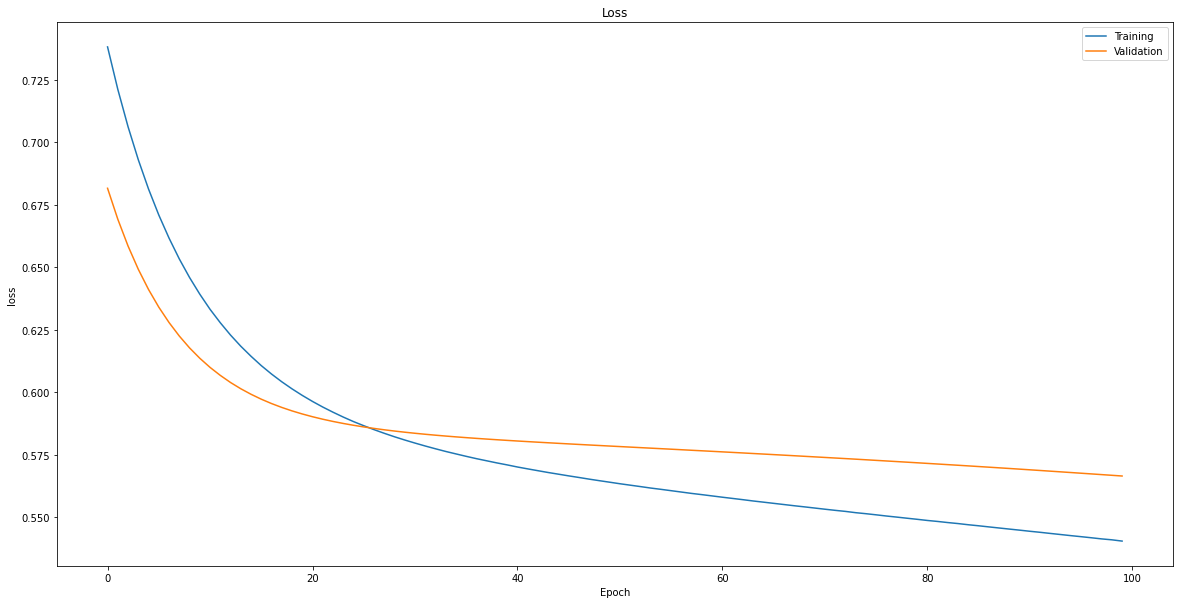

In [0]:
ff = plot_learning_loss(hst)

**Evaluate the Model:** When we are comfortable with the model that we have trained, we should evaluate the model against the testing set that we have held out.

In [0]:
## Calculate the predicted Values and Classes of both the training and testing sets
## Predicted Classes
ypc_train = nn1.predict_classes(xs_train)
ypc_test = nn1.predict_classes(xs_test)

## Predicted Probabilities
yh_train = nn1.predict(xs_train)
yh_test = nn1.predict(xs_test)

print('Training Set')
print('Accuracy', accuracy_score(ytrain, ypc_train))
print('Confusion Matrix: \n', confusion_matrix(ytrain, ypc_train))
print('AUC Score:', roc_auc_score(ytrain, yh_train), '\n\n')

print('Testing Set')
print('Accuracy', accuracy_score(ytest, ypc_test))
print('Confusion Matrix: \n', confusion_matrix(ytest, ypc_test))
print('AUC Score:', roc_auc_score(ytest, yh_test), '\n\n')

Training Set
Accuracy 0.7506666666666667
Confusion Matrix: 
 [[563   0]
 [187   0]]
AUC Score: 0.6359362088126064 


Testing Set
Accuracy 0.792
Confusion Matrix: 
 [[198   0]
 [ 52   0]]
AUC Score: 0.6179098679098679 




**Exercise**

Try fitting the same model by varying the batch size.  Try 25, 50, and 500.  How do the learning curves compare?

How well can you predict the performance on the test set using the learning curves?


## 2.3 Build a Neural Network with a Wider Layer
Here we look at building a wider neural network.

In [0]:
## Start by creating a model object
nn2 = Sequential()
## Add a hidden layer-- specify the dimension 
nn2.add(Dense(30, input_dim=xs_train.shape[1] , activation='tanh', name='hl1'))
nn2.add(Dense(1, activation='sigmoid', name='output')) ## Why don't we make this layer wider?

In [0]:
## Compile the model
np.random.seed(55) ## Set the seed for reproducibility
nn2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [0]:
## Fit the model 
hst = nn2.fit(xs_train, ytrain, batch_size=50, epochs=250, validation_split=0.2, verbose=0)

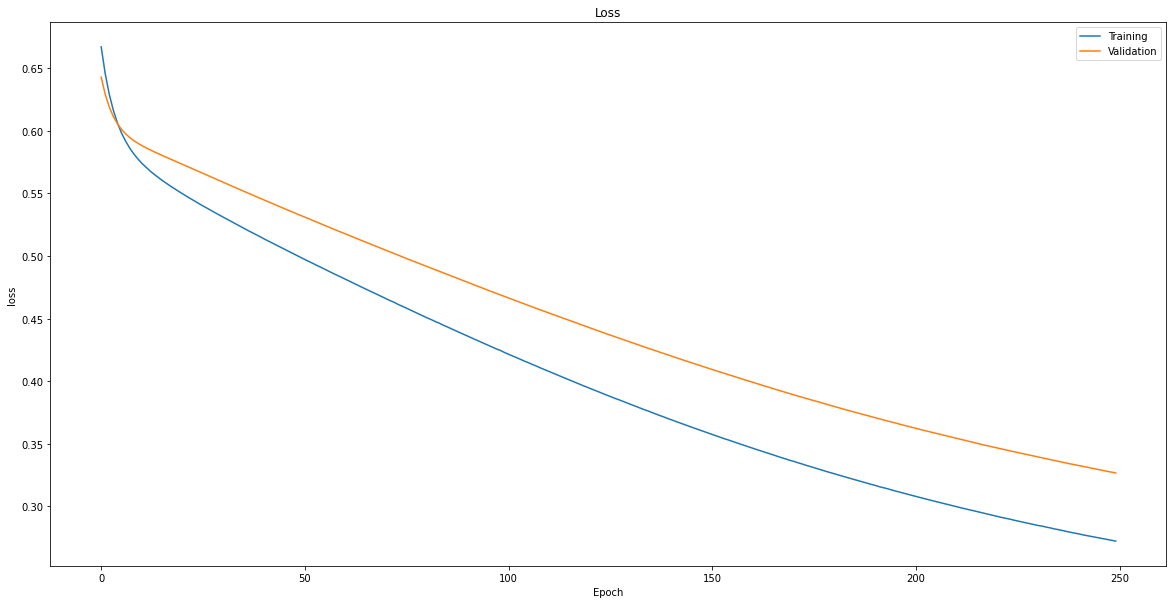

In [0]:
ff = plot_learning_loss(hst)

In [0]:
## Calculate the predicted Values and Classes of both the training and testing sets
## Predicted Classes
ypc_train = nn2.predict_classes(xs_train)
ypc_test = nn2.predict_classes(xs_test)

## Predicted Probabilities
yh_train = nn2.predict(xs_train)
yh_test = nn2.predict(xs_test)

print('Training Set')
print('Accuracy', accuracy_score(ytrain, ypc_train))
print('Confusion Matrix: \n', confusion_matrix(ytrain, ypc_train))
print('AUC Score:', roc_auc_score(ytrain, yh_train), '\n\n')

print('Testing Set')
print('Accuracy', accuracy_score(ytest, ypc_test))
print('Confusion Matrix: \n', confusion_matrix(ytest, ypc_test))
print('AUC Score:', roc_auc_score(ytest, yh_test), '\n\n')

Training Set
Accuracy 0.892
Confusion Matrix: 
 [[559   4]
 [ 77 110]]
AUC Score: 0.9721744664279405 


Testing Set
Accuracy 0.912
Confusion Matrix: 
 [[196   2]
 [ 20  32]]
AUC Score: 0.9724164724164724 




## 2.4 Build a Deeper Neural Network
Now, we examine what happens if we look at multiple layers in the network.

In [0]:
## Start by creating a model object
nn3 = Sequential()
## Add a hidden layer-- specify the dimension 
nn3.add(Dense(30, input_dim=xs_train.shape[1] , activation='tanh', name='hl1'))
nn3.add(Dense(20, activation='tanh', name='hl2'))
nn3.add(Dense(10, activation='tanh', name='hl3'))
nn3.add(Dense(1, activation='sigmoid', name='output'))

In [0]:
## Take a look at our model to make sure we built the network we are intending to build
nn3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hl1 (Dense)                  (None, 30)                420       
_________________________________________________________________
hl2 (Dense)                  (None, 20)                620       
_________________________________________________________________
hl3 (Dense)                  (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [0]:
## Compile the model
np.random.seed(55) ## Set the seed for reproducibility
nn3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [0]:
## Fit the model 
hst = nn3.fit(xs_train, ytrain, batch_size=50, epochs=250, validation_split=0.2, verbose=0)

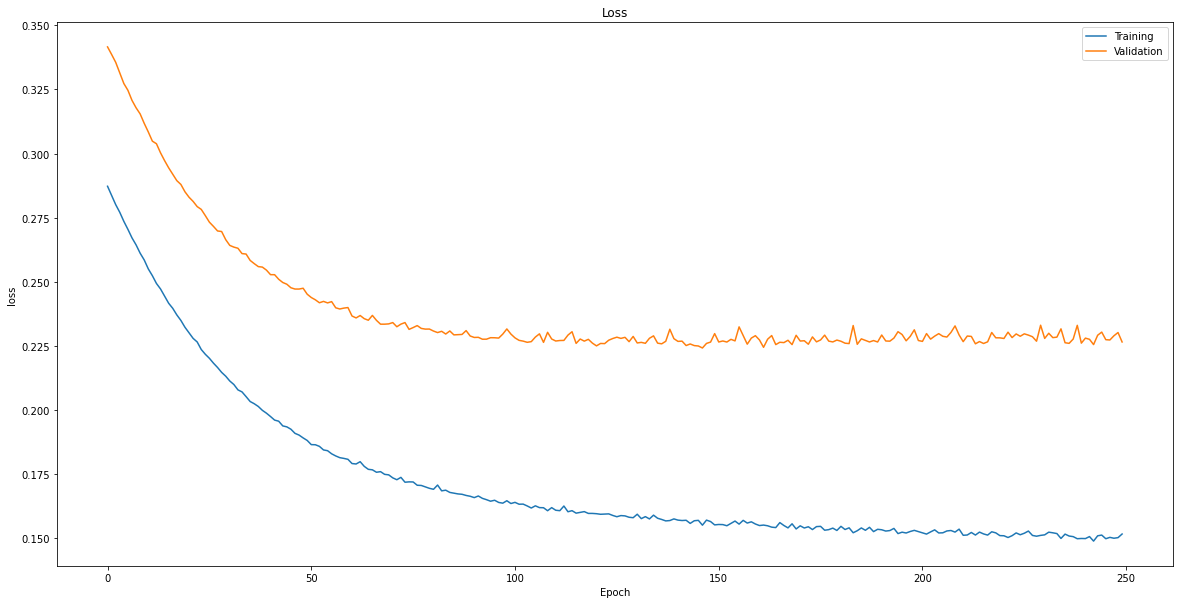

In [0]:
ff = plot_learning_loss(hst)

In [0]:
## Calculate the predicted Values and Classes of both the training and testing sets
## Predicted Classes
ypc_train = nn3.predict_classes(xs_train)
ypc_test = nn3.predict_classes(xs_test)

## Predicted Probabilities
yh_train = nn3.predict(xs_train)
yh_test = nn3.predict(xs_test)

print('Training Set')
print('Accuracy', accuracy_score(ytrain, ypc_train))
print('Confusion Matrix: \n', confusion_matrix(ytrain, ypc_train))
print('AUC Score:', roc_auc_score(ytrain, yh_train), '\n\n')

print('Testing Set')
print('Accuracy', accuracy_score(ytest, ypc_test))
print('Confusion Matrix: \n', confusion_matrix(ytest, ypc_test))
print('AUC Score:', roc_auc_score(ytest, yh_test), '\n\n')

Training Set
Accuracy 0.9306666666666666
Confusion Matrix: 
 [[538  25]
 [ 27 160]]
AUC Score: 0.9776360406911029 


Testing Set
Accuracy 0.952
Confusion Matrix: 
 [[191   7]
 [  5  47]]
AUC Score: 0.9785353535353535 




## 2.5 Build a network with different activation functions
What happens if we change the activation functions?

In [0]:
## Start by creating a model object
nn4 = Sequential()
## Add a hidden layer-- specify the dimension 
nn4.add(Dense(30, input_dim=xs_train.shape[1] , activation='relu', name='hl1'))
nn4.add(Dense(20, activation='relu', name='hl2'))
nn4.add(Dense(10, activation='relu', name='hl3'))
nn4.add(Dense(1, activation='sigmoid', name='output')) ##Why don't we want to change

In [0]:
## Take a look at our model to make sure we built the network we are intending to build
nn4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hl1 (Dense)                  (None, 30)                420       
_________________________________________________________________
hl2 (Dense)                  (None, 20)                620       
_________________________________________________________________
hl3 (Dense)                  (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [0]:
## Compile the model
np.random.seed(55) ## Set the seed for reproducibility
nn4.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [0]:
## Fit the model 
hst = nn4.fit(xs_train, ytrain, batch_size=50, epochs=100, validation_split=0.2, verbose=0)

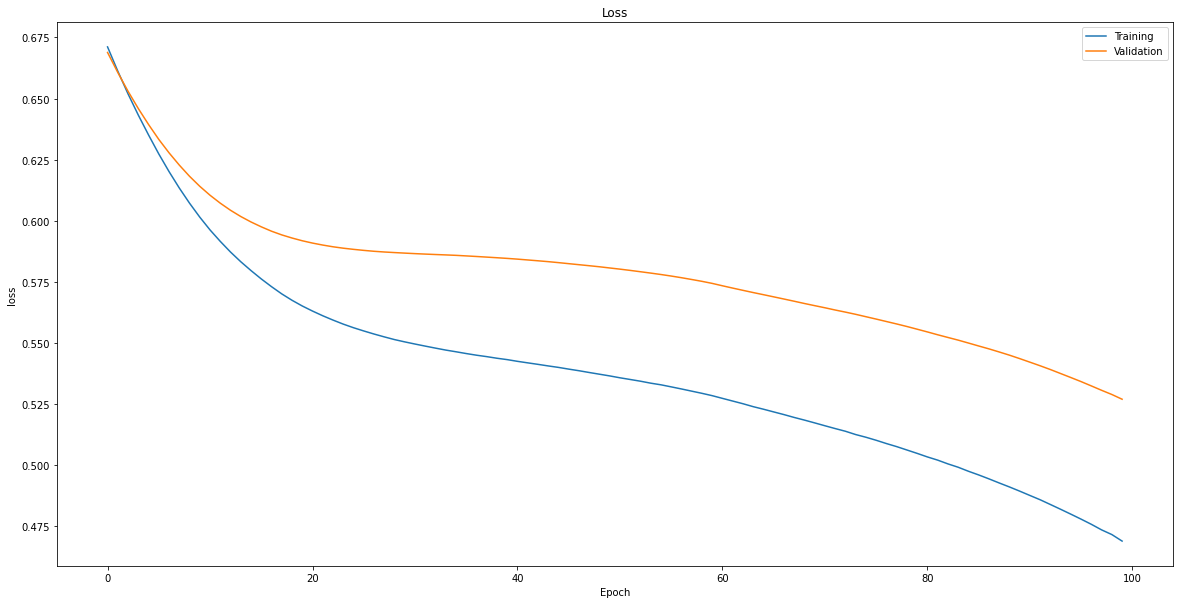

In [0]:
ff = plot_learning_loss(hst)

In [0]:
## Calculate the predicted Values and Classes of both the training and testing sets
## Predicted Classes
ypc_train = nn4.predict_classes(xs_train)
ypc_test = nn4.predict_classes(xs_test)

## Predicted Probabilities
yh_train = nn4.predict(xs_train)
yh_test = nn4.predict(xs_test)

print('Training Set')
print('Accuracy', accuracy_score(ytrain, ypc_train))
print('Confusion Matrix: \n', confusion_matrix(ytrain, ypc_train))
print('AUC Score:', roc_auc_score(ytrain, yh_train), '\n\n')

print('Testing Set')
print('Accuracy', accuracy_score(ytest, ypc_test))
print('Confusion Matrix: \n', confusion_matrix(ytest, ypc_test))
print('AUC Score:', roc_auc_score(ytest, yh_test), '\n\n')

Training Set
Accuracy 0.7506666666666667
Confusion Matrix: 
 [[563   0]
 [187   0]]
AUC Score: 0.8825144138068598 


Testing Set
Accuracy 0.792
Confusion Matrix: 
 [[198   0]
 [ 52   0]]
AUC Score: 0.8985042735042735 




# 3 Main Exercise: Build Your Own Network

Build and evaluate (at least) 3 additional neural networks.  Consider the following:
    
* Which variables to use as predictors.
* Number of Layers
* Number of nodes on each layer
* Activation Functions
* Batch Size and number of epochs
* How well your network being trained
    
Try to see if you can find any patterns in how your choices affect the performance of the network.

_Hint_: The variables and values selected below as examples may not be the best.  They are only so there is an example to work with.  Experiment on your own!

## 3.1 Select Variables

Begin by selecting a different set of the available predictors.

Do this by changing the list _pred_vars_ in the second cell below.  (The first one is just to remind you of the candidates.)



In [0]:
## Of the available variables, these may be considered to be predictors
potential_pred_vars = ['age',  'languages',
       'n_friends', 'gender_female', 'gender_male',
       'relationship_married', 'relationship_single', 'relationship_widowed',
       'music_genre_classical', 'music_genre_country',
       'music_genre_electronic', 'music_genre_folk', 'music_genre_heavy metal',
       'music_genre_hip-hop', 'music_genre_jazz', 'music_genre_rock',
       'music_genre_tibetian throat singing', 'hogwarts_gryffindor',
       'hogwarts_hufflepuff', 'hogwarts_ravenclaw', 'hogwarts_slytherin',
       'fav_pet_birds', 'fav_pet_cats', 'fav_pet_dogs', 'fav_pet_fish',
       'fav_pet_horses', 'fav_pet_reptiles', 'fav_pet_rodents']

In [0]:
## Select some of the above variables to use as predictors
## Feel free to use some of what you learned about this data in a the previous module
pred_vars = ['age', 'n_friends', 'hogwarts_gryffindor',
       'hogwarts_hufflepuff', 'hogwarts_ravenclaw', 'hogwarts_slytherin',
       'fav_pet_birds', 'fav_pet_cats', 'fav_pet_dogs', 'fav_pet_fish',
       'fav_pet_horses', 'fav_pet_reptiles', 'fav_pet_rodents']

response = 'credit'

## 3.2 Repeat train/test split and rescale

Since we've chosen new variables, we should re-do the train/test split with the new set of variables, and then rescale the variables for better training.

In [0]:


x = df[pred_vars]
y = df[response]


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=123)

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

my_scaler = MinMaxScaler()
my_scaler.fit(xtrain)


## Rescaled Data
xs_train = my_scaler.transform(xtrain)
xs_test = my_scaler.transform(xtest)




## 3.3 Build New Networks

Use the framework below to experiment with the neural network architecture.  If you want to make more than one network, feel free to copy these cells and paste them below.

In [0]:
## Start by creating a model object
nn_new = Sequential()
## Add a hidden layer-- specify the dimension 
nn_new.add(Dense(30, input_dim=xs_train.shape[1] , activation='tanh', name='hl1'))
nn_new.add(Dense(30, activation='tanh', name='hl2'))
nn_new.add(Dense(1, activation='sigmoid', name='output')) ## Why don't we make this layer wider?

In [0]:
## Compile the model
np.random.seed(55) ## Set the seed for reproducibility
nn_new.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [0]:
## Fit the model 
hst = nn_new.fit(xs_train, ytrain, batch_size=50, epochs=250, validation_split=0.2, verbose=0)

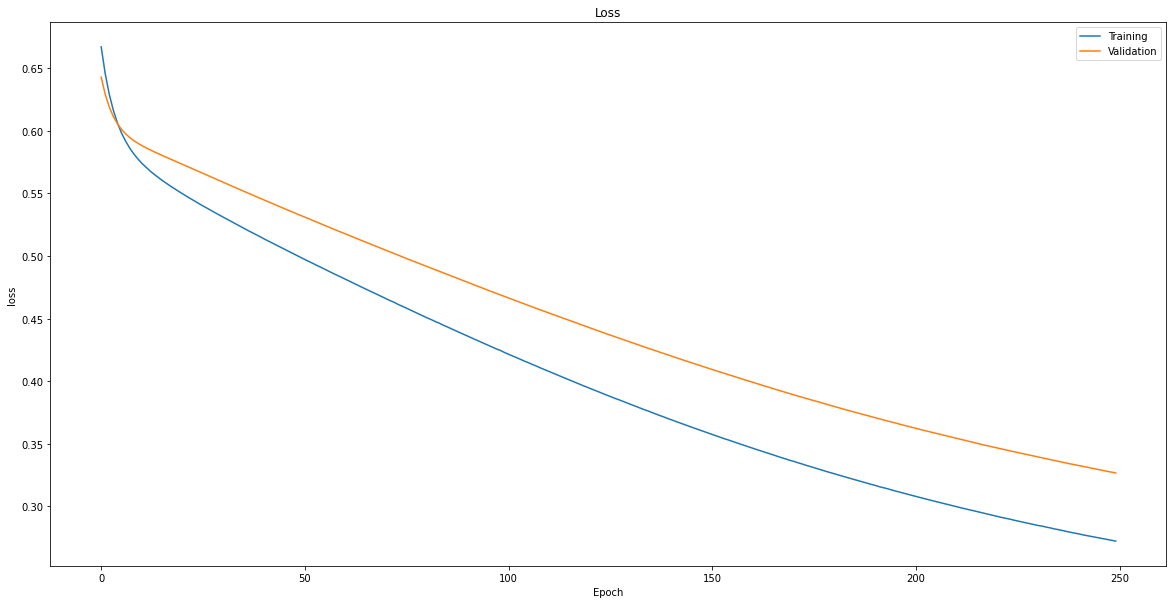

In [0]:
ff = plot_learning_loss(hst)

In [0]:
## Calculate the predicted Values and Classes of both the training and testing sets
## Predicted Classes
ypc_train = nn_new.predict_classes(xs_train)
ypc_test = nn_new.predict_classes(xs_test)

## Predicted Probabilities
yh_train = nn2.predict(xs_train)
yh_test = nn2.predict(xs_test)

print('Training Set')
print('Accuracy', accuracy_score(ytrain, ypc_train))
print('Confusion Matrix: \n', confusion_matrix(ytrain, ypc_train))
print('AUC Score:', roc_auc_score(ytrain, yh_train), '\n\n')

print('Testing Set')
print('Accuracy', accuracy_score(ytest, ypc_test))
print('Confusion Matrix: \n', confusion_matrix(ytest, ypc_test))
print('AUC Score:', roc_auc_score(ytest, yh_test), '\n\n')

Training Set
Accuracy 0.892
Confusion Matrix: 
 [[559   4]
 [ 77 110]]
AUC Score: 0.9721744664279405 


Testing Set
Accuracy 0.912
Confusion Matrix: 
 [[196   2]
 [ 20  32]]
AUC Score: 0.9724164724164724 


